In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import GatherData as Gather
    import Graphs
    import Utils

systems = ['jabref','prom','team']
plt.style.use("seaborn-whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# File containing settings
path_to_yaml = '../config.yaml'
config = Utils.read_yaml_file(path_to_yaml)
files = []
dfs = [] # Order: [jabref, prom , team]
df_total = None
for system in systems:
    files.append(config['file locations'][system]['preprocess comparisons'])
    tmp_df = pd.read_csv("../" + config['file locations'][system]['preprocess comparisons'])
    tmp_df['system'] = system
    dfs.append(tmp_df)
    
jabref_bow = dfs[0].loc[dfs[0]['Feature rep.'].isin(['Bag-of-words'])]
jabref_tfidf = dfs[0].loc[dfs[0]['Feature rep.'].isin(['TF-IDF'])]

prom_bow = dfs[1].loc[dfs[1]['Feature rep.'].isin(['Bag-of-words'])]
prom_tfidf = dfs[1].loc[dfs[1]['Feature rep.'].isin(['TF-IDF'])]

team_bow = dfs[2].loc[dfs[2]['Feature rep.'].isin(['Bag-of-words'])]
team_tfidf = dfs[2].loc[dfs[2]['Feature rep.'].isin(['TF-IDF'])]

In [3]:
df_temp = [dfs[0], dfs[1], dfs[2]]
df_all = pd.concat(df_temp)
tmp_all = df_all.copy()
tmp_all=tmp_all.drop(columns=['train_size','test_size', 'settings', 'report_table'])
df_all = df_all.drop(columns=['settings','report_table', 'train_size', 'test_size'])



indices = df_all[(df_all['setting_id'] == 's1')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's2')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's4')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's3')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's5')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's6')].index  
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's7')].index
df_all.drop(indices, inplace=True)

tmp_all = tmp_all.rename(columns={'macro_precision' : 'Macro precision',
                  'macro_recall' : 'Macro recall',
                  'weighted_precision' : 'Weighted precision',
                  'weighted_recall' : 'Weighted recall',
                  'macro_f1' : 'Macro f1-score',
                  'weighted_f1' : 'Weighted f1-score'})

In [4]:
systems = ['jabref','prom','team']
size_type = 'ratio'
df_list = []

from pathlib import Path


for system in systems:
    fn = 'size_' + size_type + '_' + system + '.csv'
    fp = Path.cwd().parent/'Data'/system/fn
    tmp = pd.read_csv(fp)
    df_list.append(tmp)

df_sizes = pd.concat([df_list[0],df_list[1],df_list[2]])

df_sizes_ratio = df_sizes.copy()

In [5]:
maxEnt_df = df_sizes[df_sizes['classifier']=='maxEnt']
svm_df = df_sizes[df_sizes['classifier']=='svm']
naive_df = df_sizes[df_sizes['classifier']=='naive']


maxEnt_avg = maxEnt_df.groupby('size').mean()
maxEnt_avg.reset_index(inplace=True)

svm_avg = svm_df.groupby('size').mean()
svm_avg.reset_index(inplace=True)

naive_avg = naive_df.groupby('size').mean()
naive_avg.reset_index(inplace=True)


train_size = ['10', '15', '20', '25']

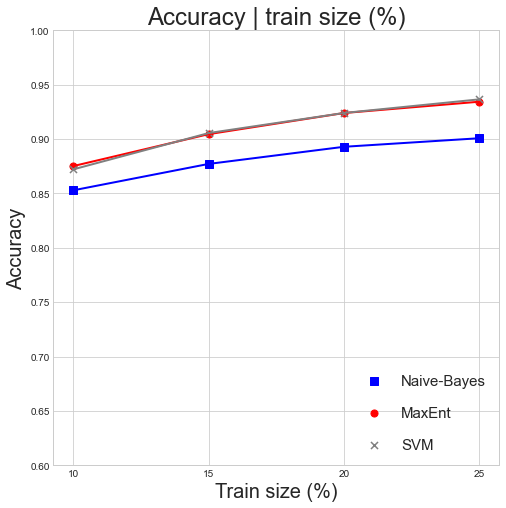

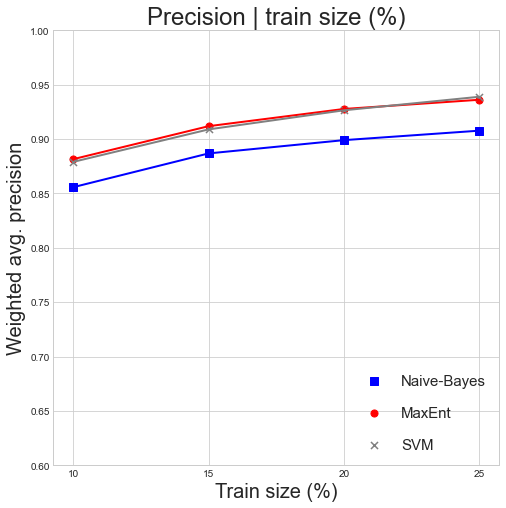

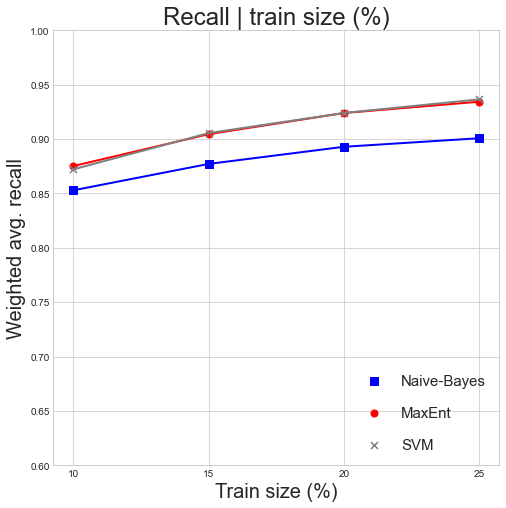

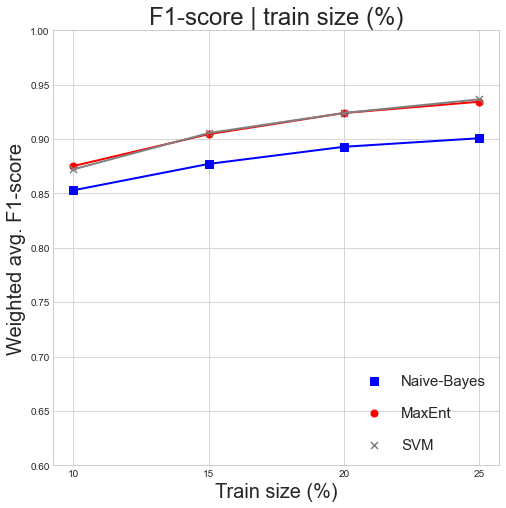

In [6]:
#########ACCURACY#############################
Graphs.plot_line_graph("Accuracy | train size (%)", train_size,{
                                                            'naive': naive_avg['accuracy'],
                                                            'maxEnt': maxEnt_avg['accuracy'],
                                                            'svm': svm_avg['accuracy']
                                                            }, "Train size (%)", "Accuracy", type ="accuracy")
##############################################

##############PRECISION#######################
Graphs.plot_line_graph("Precision | train size (%)", train_size, {
                                                            'naive': naive_avg['precision'],
                                                            'maxEnt': maxEnt_avg['precision'],
                                                            'svm': svm_avg['precision']
                                                            }, "Train size (%)", "Weighted avg. precision", type = "accuracy")

##############RECALL#######################
Graphs.plot_line_graph("Recall | train size (%)", train_size, {'naive': naive_avg['recall'],
                                                             'maxEnt': maxEnt_avg['recall'],
                                                             'svm': svm_avg['recall']
                                                            }, "Train size (%)", "Weighted avg. recall", type = "accuracy")

Graphs.plot_line_graph("F1-score | train size (%)", train_size, {'naive': naive_avg['f1'],
                                                             'maxEnt': maxEnt_avg['f1'],
                                                             'svm': svm_avg['f1']
                                                            }, "Train size (%)", "Weighted avg. F1-score", type = "accuracy")


In [7]:
systems = ['jabref','prom','team']
size_type = 'abs'
df_list = []

from pathlib import Path


for system in systems:
    fn = 'size_' + size_type + '_' + system + '.csv'
    fp = Path.cwd().parent/'Data'/system/fn
    tmp = pd.read_csv(fp)
    df_list.append(tmp)

df_sizes = pd.concat([df_list[0],df_list[1],df_list[2]])

df_sizes_abs = df_sizes.copy()

In [8]:
maxEnt_df = df_sizes[df_sizes['classifier']=='maxEnt']
svm_df = df_sizes[df_sizes['classifier']=='svm']
naive_df = df_sizes[df_sizes['classifier']=='naive']


maxEnt_avg = maxEnt_df.groupby('size').mean()
maxEnt_avg.reset_index(inplace=True)

svm_avg = svm_df.groupby('size').mean()
svm_avg.reset_index(inplace=True)

naive_avg = naive_df.groupby('size').mean()
naive_avg.reset_index(inplace=True)


train_size = ['5', '10', '15', '20', '25']

maxEnt_avg
svm_avg
naive_avg

,size,accuracy,precision,recall,f1
0,5,0.652716,0.823449,0.652716,0.652716
1,10,0.805803,0.850061,0.805803,0.805803
2,15,0.842418,0.886634,0.842418,0.842418
3,20,0.859234,0.896149,0.859234,0.859234
4,25,0.886466,0.914852,0.886466,0.886466


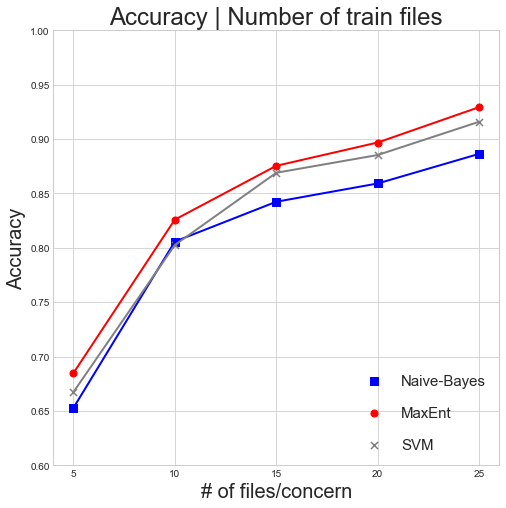

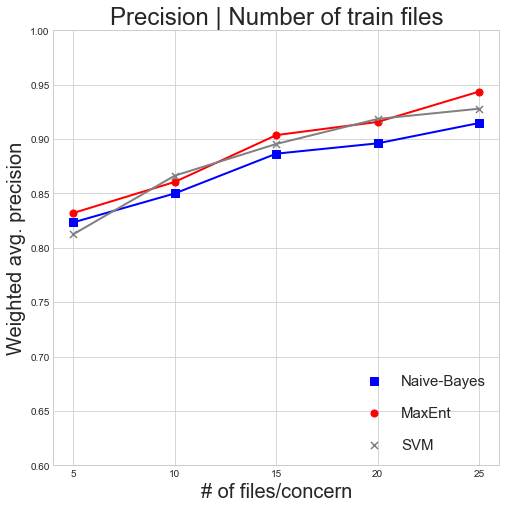

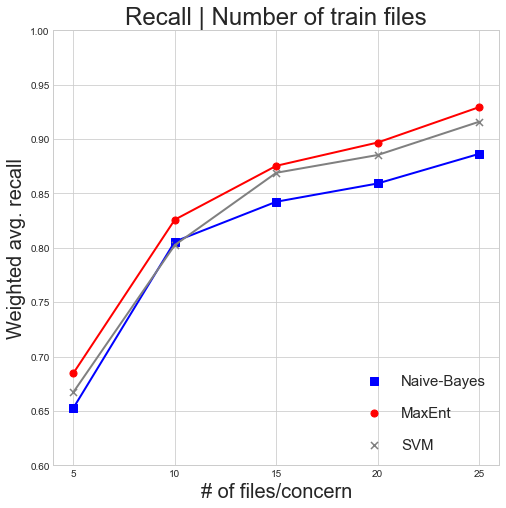

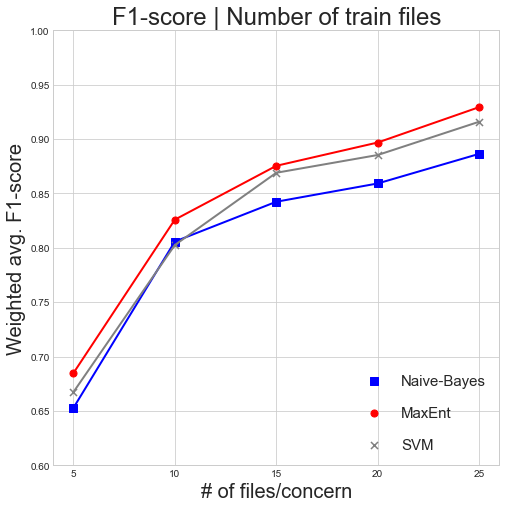

In [9]:
#########ACCURACY#############################

Graphs.plot_line_graph("Accuracy | Number of train files", train_size,{
                                                            'naive': naive_avg['accuracy'],
                                                            'maxEnt': maxEnt_avg['accuracy'],
                                                            'svm': svm_avg['accuracy']
                                                            }, "# of files/concern", "Accuracy", type ="accuracy")
##############################################

##############PRECISION#######################
Graphs.plot_line_graph("Precision | Number of train files", train_size, {
                                                            'naive': naive_avg['precision'],
                                                            'maxEnt': maxEnt_avg['precision'],
                                                            'svm': svm_avg['precision']
                                                            }, "# of files/concern", "Weighted avg. precision", type = "accuracy")

##############RECALL#######################
Graphs.plot_line_graph("Recall | Number of train files", train_size, {'naive': naive_avg['recall'],
                                                             'maxEnt': maxEnt_avg['recall'],
                                                             'svm': svm_avg['recall']
                                                            }, "# of files/concern", "Weighted avg. recall", type = "accuracy")

Graphs.plot_line_graph("F1-score | Number of train files", train_size, {'naive': naive_avg['f1'],
                                                             'maxEnt': maxEnt_avg['f1'],
                                                             'svm': svm_avg['f1']
                                                            }, "# of files/concern", "Weighted avg. F1-score", type = "accuracy")